In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

## Load digits dataset

In [2]:
# dataset from skearn with 8x8 digits.
digits = load_digits(n_class=10)
X = digits.data
y = digits.target

## Samples from dataset

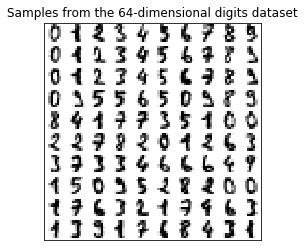

In [3]:
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Samples from the 64-dimensional digits dataset')
plt.show()

## Random initialization

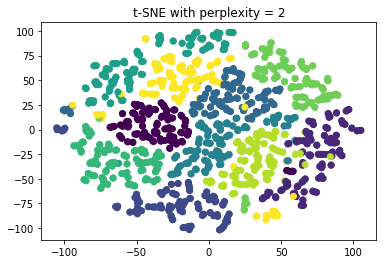

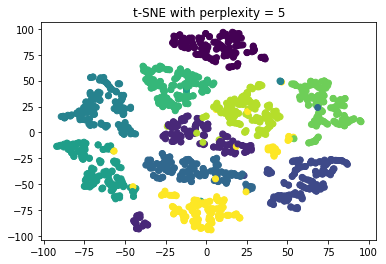

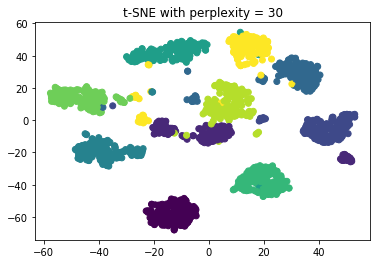

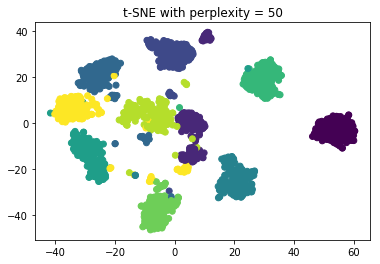

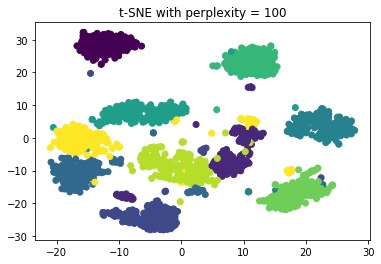

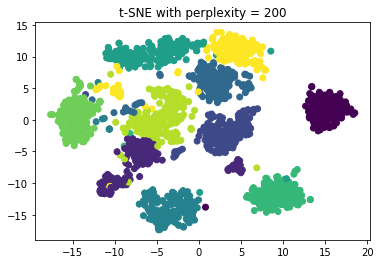

In [4]:
from sklearn.manifold import TSNE

for i in [2, 5, 30, 50, 100, 200]:
    model = TSNE(n_components=2, init='random', perplexity=i)
    np.set_printoptions(suppress=True)
    Y = model.fit_transform(X)

    plt.scatter(Y[:, 0], Y[:, 1], c=y)
    plt.title('t-SNE with perplexity = {}'.format(i))
    plt.show()

## PCA initialization

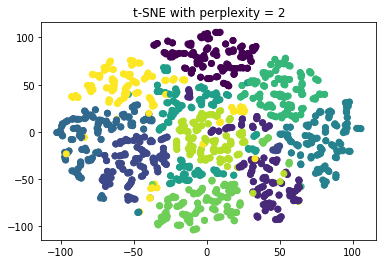

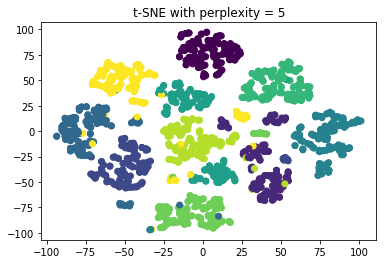

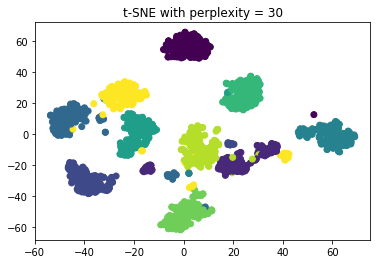

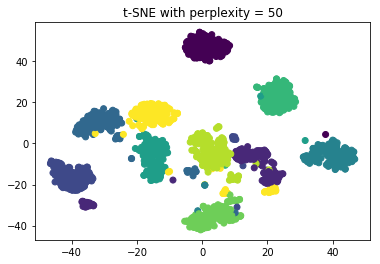

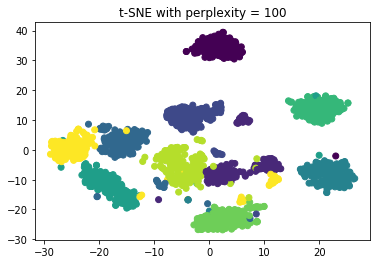

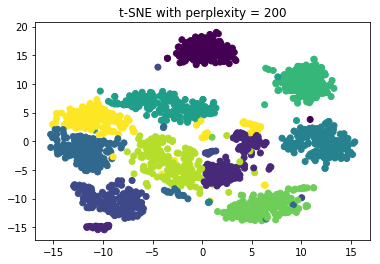

In [5]:
for i in [2, 5, 30, 50, 100, 200]:
    model = TSNE(n_components=2, init='pca', perplexity=i)
    np.set_printoptions(suppress=True)
    Y = model.fit_transform(X)

    plt.scatter(Y[:, 0], Y[:, 1], c=y)
    plt.title('t-SNE with perplexity = {}'.format(i))
    plt.show()

## 10-NN (t-SNE components)

In [138]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10).fit(Y)
distances, indices = neighbors.kneighbors(Y)

In [139]:
sample = 87

In [140]:
distances[sample]

array([0.        , 1.00320969, 1.01654188, 1.03255766, 1.26539177,
       1.41991983, 1.42389163, 1.66906666, 1.68947482, 1.77588545])

In [141]:
nns = [y[i] for i in indices[sample]]
nns

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

## 10-NN (Image flattened)

In [142]:
neighbors = NearestNeighbors(n_neighbors=10).fit(X)
distances, indices = neighbors.kneighbors(X)

In [143]:
distances[sample]

array([ 0.        , 22.69361144, 26.32489316, 27.25802634, 28.68797658,
       28.93095228, 29.25747768, 29.37686164, 30.09983389, 30.61045573])

In [144]:
nns = [y[i] for i in indices[sample]]
nns

[4, 4, 4, 1, 4, 1, 1, 4, 5, 4]